# 6

<a style="color:darkblue;" class="anchor" id="0.1"> 
# **Table of Content**
</a>


## 1. [Data Exploration](#1)
### - 1.1 [Loading Libraries](#1.1)
### - 1.2 [Loading Dataset](#1.2) 
## 2. [Data Visualization](#2)
## 3. [Correlations](#3)
### - 3.1 [Correlations: Dataset Variables](#3.1)
### - 3.2 [Correlations: Features vs Target Variables](#3.2)
## 4. [Applying RandomForestRegressor Algorithm](#4)
### - 4.2. [Predictions](#4.1)
### - 4.3. [Checking for accuracy](#4.2)
### - 4.4. [Visualization](#4.3)
### - 4.5. [Error Metrics](#4.4)
## 5. [Applying Linear Regression Algorithm](#5)
### - 5.2. [Predictions](#5.1)
### - 5.3. [Printing model](#5.2)
### - 5.4. [Visualization](#5.3)
### - 5.5. [Error Metrics](#5.4)
## 6. [Applying Ridge Regression Algorithm](#6)
### - 6.2. [Predictions](#6.1)
### - 6.3. [Printing model](#6.2)
### - 6.4. [Visualization](#6.3)
### - 6.5. [Error Metrics](#6.4)
## 6. [Overall Error Metrics & Conclusion](#7)


## Data Exploration

In [1]:
### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pandas import scatter_matrix
import sklearn as svm

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="1"></a>
## Load Dataset

In [3]:
house_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/Housing_Data.csv")
df = house_Df.copy()
house_Df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


For better assesment, let reindex the d/set with the `Address`

In [4]:
house_Df[(house_Df['Address'].value_counts().values > 1)].sum()

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

In [5]:
house_Df = house_Df.set_index(['Address'])
house_Df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Address,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Now all the variables we are considering are Numerical, the next step is to check for any misdemeanour.

In [6]:
house_Df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
house_Df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<a class="anchor" id="2"></a>
## Data Visualization

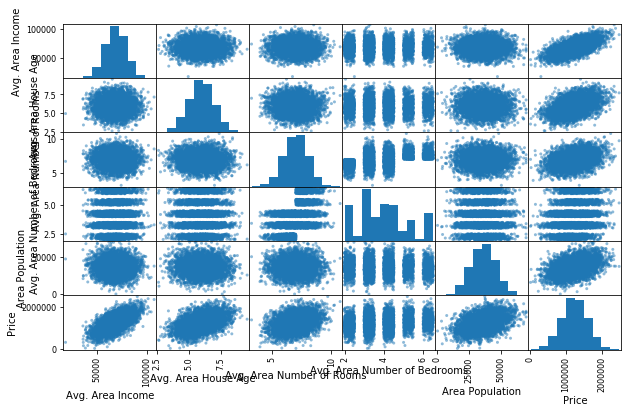

In [8]:
scatter_matrix(house_Df,figsize = (10, 6))
plt.show()

All our variables seem to follow a normal distribution - perhaps because we are dealing with Average values, also there is no sign of a generic correlation.

Now we face a dillema, we can or not bin the `Area Number of Bedroom` - a Continuous variable, into a CAT as it characteristicaly shows in our graph. For now let us leave as it is.

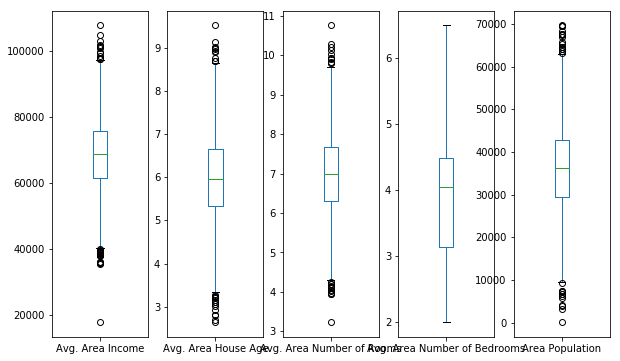

In [9]:
# Boxplots
house_Df.drop(columns = 'Price').plot(kind = 'box', subplots = True, 
              figsize = (10, 6, ), sharex = False, sharey = False)
plt.show()

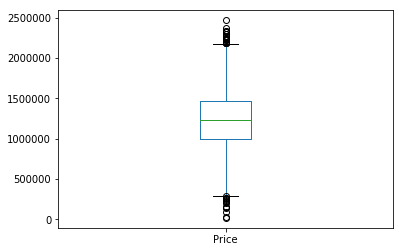

In [10]:
house_Df['Price'].plot(kind = 'box')

A few outliers, each one of our dataset seem to be in some ways equally distributed. Correlations will help define the relationship between and amoung our features, in the next chunks we will examine such relationships.

<a class="anchor" id="3"></a>
## Correlations

<a class="anchor" id="3.1"></a>
### Correlations: Dataset Variables

In [11]:
corr = house_Df.corr().unstack().sort_values(kind = 'quicksort').reset_index()
corr = corr[corr['level_0'] != corr['level_1']][::2]
corr.columns = ['Feature 1', 'Feature 2', 'Corr _Coef']
corr[::-1]

,Feature 1,Feature 2,Corr _Coef
28,Price,Avg. Area Income,0.639734
26,Avg. Area Number of Bedrooms,Avg. Area Number of Rooms,0.462695
24,Avg. Area House Age,Price,0.452543
22,Price,Area Population,0.408556
20,Avg. Area Number of Rooms,Price,0.335664
18,Price,Avg. Area Number of Bedrooms,0.171071
16,Avg. Area Income,Avg. Area Number of Bedrooms,0.019788
14,Avg. Area House Age,Avg. Area Number of Bedrooms,0.006149
12,Area Population,Avg. Area Number of Rooms,0.002040
10,Avg. Area Income,Avg. Area House Age,-0.002007


Every Feature correlates positively with our Target variable, and very highly with `Avg. Area Income`. There has never been a better time to become a landlord.

Next, we will see how the features correlate with the `Target`.

<a class="anchor" id="3.2"></a>
### Correlations: Features x Target Variable

In [12]:
X = house_Df.drop(columns = 'Price')
y = house_Df['Price']

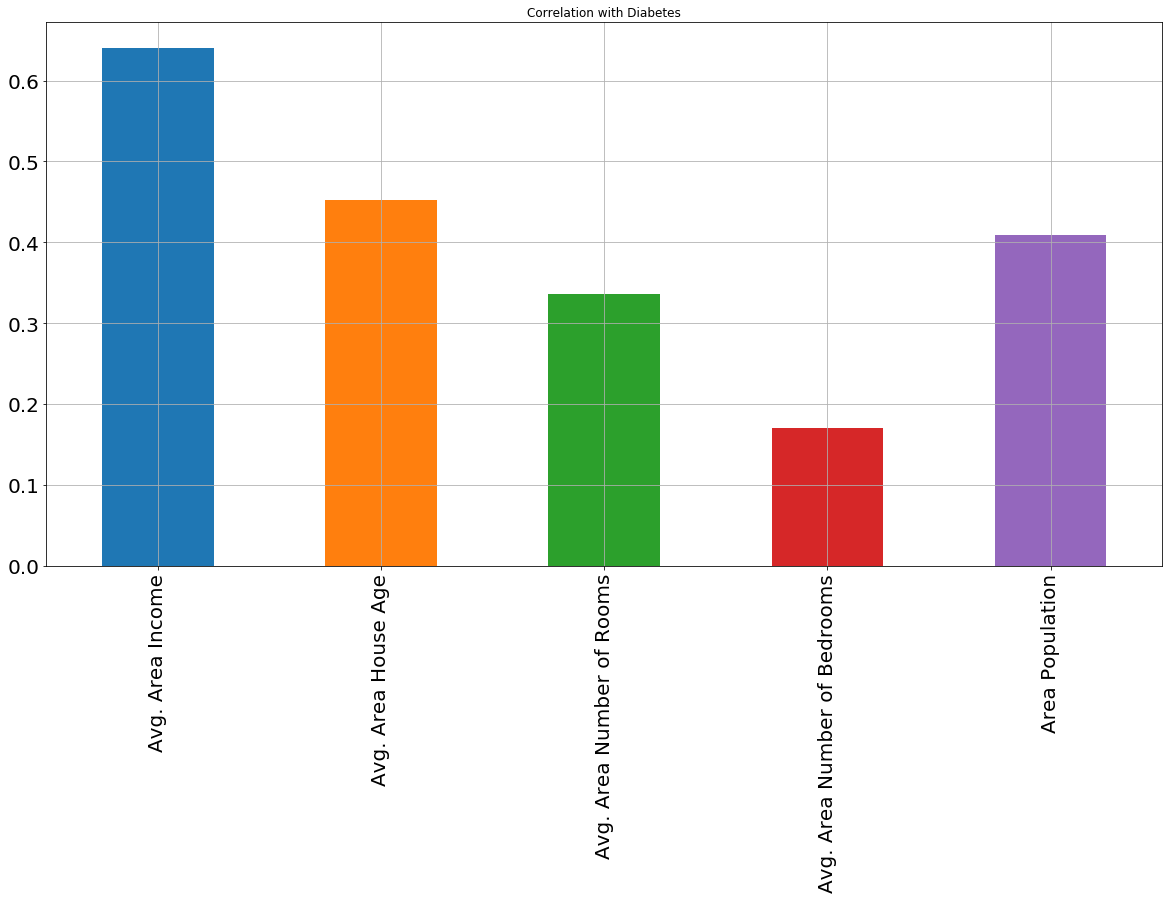

In [13]:
X.corrwith(y).plot.bar(figsize = (20, 10), 
                       title = "Correlation with Diabetes", 
                       fontsize = 20, rot = 90,grid = True)
plt.show()

# APPLYING MODELS
- Split the Dataset
- Apply suitable model
- - RandomForestRegressor
- - Linear Regression*
- - Ridge Regression
- Make Predictions
- Visualize Predictions
- Compute Error Metrics

## Split DataSet

In [14]:
from sklearn.model_selection import train_test_split
X = X.values
y = y.values

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.20, 
                                                  random_state = 42)

<a class="anchor" id="4"></a>
## APPLYING RandomForestRegressor Algorithm

### Tweaking HyperParameters

### Output
Best parameters: {'criterion': 'mae', 'max_depth': 21, 'random_state': 26}
Best parameters: 0.8678966649223432

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

## Feeding the hyper-parameters from GridSearchCV
rfr = RandomForestRegressor(criterion = 'mae', 
                            max_depth = 21, random_state = 26)

pipe = Pipeline([('scalar', StandardScaler()),('rfr', rfr)])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfr', RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=21,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=26, verbose=0, warm_start=False))])

## Predictions

In [16]:
rfr.fit(X_train,y_train)

rfr_pred = rfr.predict(X_val)

### Testing RandomForest Regression Predictions

In [17]:
rfr_pred_df = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': rfr_pred.flatten(),
                         'Diff': (y_val - rfr_pred).flatten()})

print(rfr_pred_df.head(), '\n')
print(rfr_pred_df['Diff'].mean())

        Auctual     Predicted           Diff
0  1.339096e+06  1.284955e+06   54140.921131
1  1.251794e+06  1.251700e+06      94.239145
2  1.340095e+06  1.324458e+06   15637.361393
3  1.431508e+06  1.281738e+06  149769.186207
4  1.042374e+06  1.199265e+06 -156891.882943 

970.5646092148884


### Visualizing Accuracy: Histograms

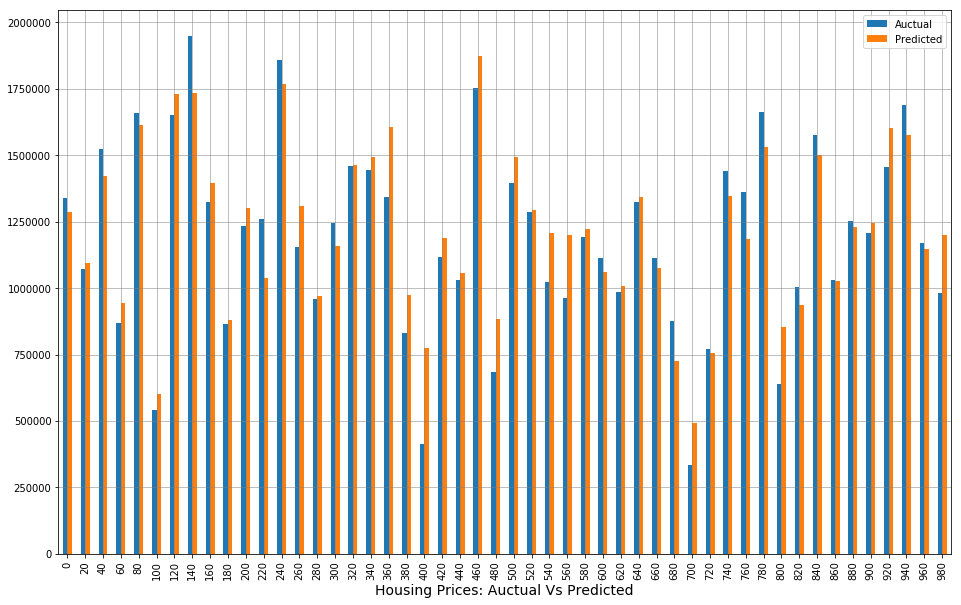

In [18]:
rf_plot = rfr_pred_df.drop(columns = 'Diff')[::20] # Every (n/20)th Value

rf_plot.plot(kind = 'bar', figsize = (16, 10)) 

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Housing Prices: Auctual Vs Predicted', fontsize = 14)

plt.show()

### Error Metrics

In [19]:
from sklearn import metrics

mae  =  np.round(metrics.mean_absolute_error(y_val, rfr_pred), 5)
mse  =  np.round(metrics.mean_squared_error(y_val, rfr_pred), 5)
rmse =  np.round(np.sqrt(metrics.mean_absolute_error(y_val, rfr_pred)), 5)

df_mean = house_Df['Price'].describe().values[1]
ratio = np.round(((rmse / df_mean) * 100), 5)

In [20]:
result1 = pd.DataFrame([['RF Regressor', mae, mse, rmse, ratio]], 
                       columns = ['Model', 'MAE', 'MSE', 'RMSE', '10%RATIO']) 

result1

,Model,MAE,MSE,RMSE,10%RATIO
0,RF Regressor,100476.75393,1.625887e+10,316.98068,0.02573


RMSE is relatively minor @ **~0.026%** of the average original `Prices`, we can interpret this model as not very accurate but can do a good job of Price predictions. 

We can explore other Regression modelling techniques and compare the metrics.

<a class="anchor" id="5"></a>
## APPLYING LINEAR REGRESSION

In [21]:
# Calling our model
from sklearn.linear_model import LinearRegression

In [22]:
linR = LinearRegression()

linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Parameters

In [23]:
def pretty_print_coefs(coefs, df, names = None, sort = False):
    if names == None:
        names = [ x for x in df.columns]
    lst = zip(coefs, names)
    if sort: # = True
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s\n" % (round(coef, 3), name)
                     for coef, name in lst)

print("Linear Regression Model:\n Intercept: {}\n\n Slope:  \n   {} ".
      format(round(linR.intercept_, 3), pretty_print_coefs(linR.coef_, house_Df)))

Linear Regression Model:
 Intercept: -2635072.901

 Slope:  
   21.652 * Avg. Area Income
 + 164666.481 * Avg. Area House Age
 + 119624.012 * Avg. Area Number of Rooms
 + 2440.378 * Avg. Area Number of Bedrooms
 + 15.27 * Area Population
 


Following our model's `Intercept`, the Housing Price will fall independentof any influence, however has we must have seen in previous correlations, our features all have positive values.

The insight here for **developers**, is to build or rather invest in houses, where all these features are high, or progressive, it is also interesting to see that `Income` is not that much of an influencing variable.

### Predictions

In [24]:
linR_pred = linR.predict(X_val)

#### Testing Predictions

In [25]:
linR_pred_df = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': linR_pred.flatten(),
                         'Diff': (y_val - linR_pred).flatten()})

print(linR_pred_df.head(), '\n')
print(linR_pred_df['Diff'].mean())

        Auctual     Predicted           Diff
0  1.339096e+06  1.308588e+06   30508.150248
1  1.251794e+06  1.237037e+06   14756.949343
2  1.340095e+06  1.243429e+06   96665.625898
3  1.431508e+06  1.228900e+06  202607.409824
4  1.042374e+06  1.063321e+06  -20947.383011 

349.8966110237776


### Visualizing Accuracy: Histograms

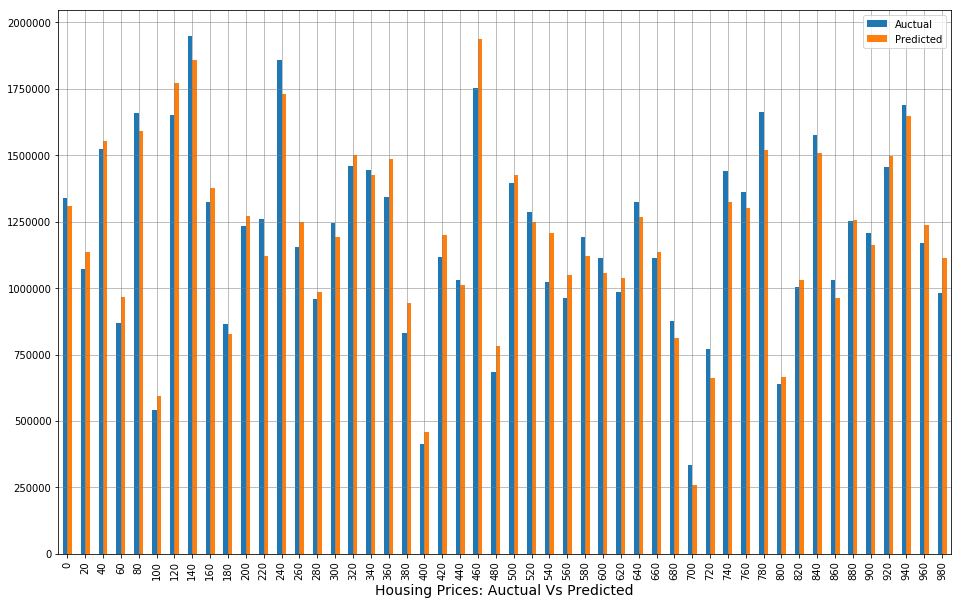

In [26]:
linR_plot = linR_pred_df.drop(columns = 'Diff')[::20] # Every (n/20)th Value

linR_plot.plot(kind = 'bar', figsize = (16, 10)) 

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Housing Prices: Auctual Vs Predicted', fontsize = 14)

plt.show()

### Error Metrics

In [27]:
from sklearn import metrics

predictions = linR_pred

mae  =  np.round(metrics.mean_absolute_error(y_val, predictions), 5)
mse  =  np.round(metrics.mean_squared_error(y_val, predictions), 5)
rmse =  np.round(np.sqrt(metrics.mean_absolute_error(y_val, predictions)), 5)

ratio = np.round(((l_rmse / df_mean) * 100), 5)

NameError: name 'l_rmse' is not defined

In [ ]:
result2 = pd.DataFrame([['Linear Regression', mae, mse, rmse, ratio]], 
                       columns = ['Model', 'MAE', 'MSE', 'RMSE', '10%RATIO']) 

result2 = result1.append(results2, ignore_index = True)
result2

The Linear Regression algorithm produces a better model, given the RMSE, and its ratio to the `target` mean. Plus, this actually generates a model as we have seen above.

In the next chunks we will explore the `Ridge Regression` algorithm.

<a class="anchor" id="6"></a>
## APPLYING RIDGE REGRESSION

In [ ]:
# Calling our model
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
ridge = Ridge(fit_intercept = True, 
                            random_state = 1, solver ='auto')

ridge.fit(X_train, y_train)

## Model Parameters

In [ ]:
def pretty_print_coefs(coefs, df, names = None, sort = False):
    if names == None:
        names = [ x for x in df.columns]
    lst = zip(coefs, names)
    if sort: # = True
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s\n" % (round(coef, 3), name)
                     for coef, name in lst)

print("Ridge Regression Model:\n Intercept: {}\n\n Slope:  \n   {} ".
      format(round(ridge.intercept_, 3), pretty_print_coefs(ridge.coef_, house_Df)))

Following our model's `Intercept`, the Housing Price will fall independentof any influence, however has we must have seen in previous correlations, our features all have positive values.

The previous insight is still upheld here.

## Predictions

In [ ]:
ridge_pred = ridge.predict(X_val)

### Testing Predictions

In [ ]:
ridge_pred_df = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': ridge_pred.flatten(),
                         'Diff': (y_val - ridge_pred).flatten()})

print(ridge_pred_df.head(), '\n')
print(ridge_pred_df['Diff'].mean())

### Visualizing Accuracy: Histograms

In [ ]:
ridge_plot = ridge_pred_df.drop(columns = 'Diff')[::20] # Every (n/20)th Value

ridge_plot.plot(kind = 'bar', figsize = (16, 10)) 

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Housing Prices: Auctual Vs Predicted', fontsize = 14)

plt.show()

### Error Metrics

In [ ]:
predictions = ridge_pred

mae  =  np.round(metrics.mean_absolute_error(y_val, predictions), 5)
mse  =  np.round(metrics.mean_squared_error(y_val, predictions), 5)
rmse =  np.round(np.sqrt(metrics.mean_absolute_error(y_val, predictions)), 5)

ratio = np.round(((rmse / df_mean) * 100), 5)

In [ ]:
result3 = pd.DataFrame([['Ridge Regression', mae, mse, rmse, ratio]], 
                       columns = ['Model', 'MAE', 'MSE', 'RMSE', '10%RATIO']) 

result2.append(results3, ignore_index = True)

<a class="anchor" id="7"></a>
## OVERALL ERROR METRICS & CONCLUSION

In [ ]:
results = result2.append(result3, ignore_index = True)
results.sort_values(by = 'RMSE')

In all, the Linear Regression algorithm produces a best model, given the RMSE, and its ratio to the `target` mean. Plus, unlike the `RFR` this actually generates a model as we have seen above.
